# 泊松分布（Poisson Distribution）
***
## 定义：

现实生活多数服从于泊松分布

假设你在一个呼叫中心工作，一天里你大概会接到多少个电话？它可以是任何一个数字。现在，呼叫中心一天的呼叫总数可以用泊松分布来建模。这里有一些例子：

- 医院在一天内录制的紧急电话的数量。
- 某个地区在一天内报告的失窃的数量。
- 在一小时内抵达沙龙的客户人数。
- 在特定城市上报的自杀人数。
- 书中每一页打印错误的数量。
泊松分布适用于在随机时间和空间上发生事件的情况，其中，我们只关注事件发生的次数。

当以下假设有效时，则称为泊松分布

- 任何一个成功的事件都不应该影响另一个成功的事件。
- 在短时间内成功的概率必须等于在更长的间内成功的概率。
- 时间间隔很小时，在给间隔时间内成功的概率趋向于零。

泊松分布中使用了这些符号：

- λ是事件发生的速率
- t是时间间隔的长
- X是该时间间隔内的事件数。
- 其中，X称为泊松随机变量，X的概率分布称为泊松分布。

- 令μ表示长度为t的间隔中的平均事件数。那么，µ = λ*t。


例如说一个医院中，每个病人来看病都是随机并独立的概率，则该医院一天（或者其他特定时间段，一小时，一周等等）接纳的病人总数可以看做是一个服从poisson分布的随机变量。但是为什么可以这样处理呢？
通俗定义：假定一个事件在一段时间内随机发生，且符合以下条件：
- （1）将该时间段无限分隔成若干个小的时间段，在这个接近于零的小时间段里，该事件发生一次的概率与这个极小时间段的长度成正比。
- （2）在每一个极小时间段内，该事件发生两次及以上的概率恒等于零。
- （3）该事件在不同的小时间段里，发生与否相互独立。

则该事件称为poisson process。这个第二定义就更加利于大家理解了，回到医院的例子之中，如果我们把一天分成24个小时，或者24x60分钟，或者24x3600秒。时间分的越短，这个时间段里来病人的概率就越小（比如说医院在正午12点到正午12点又一毫秒之间来病人的概率是不是很接近于零？）。 条件一符合。另外如果我们把时间分的很细很细，是不是同时来两个病人（或者两个以上的病人）就是不可能的事件？即使两个病人同时来，也总有一个人先迈步子跨进医院大门吧。条件二也符合。倒是条件三的要求比较苛刻。应用到实际例子中就是说病人们来医院的概率必须是相互独立的，如果不是，则不能看作是poisson分布。

## 公式

$$ f(x|\lambda) = \frac{\lambda^{x}e^{-\lambda}}{x!}$$
where $\lambda$ denotes the mean of the distribution.


已知平均每小时出生3个婴儿，请问下一个小时，会出生几个？

有可能一下子出生6个，也有可能一个都不出生。这是我们没法知道的。

泊松分布就是描述某段时间内，事件具体的发生概率。

<img src="./img/3.png" style="width:200px;height:100px;float:left"> 


上面就是泊松分布的公式。等号的左边，P 表示概率，N表示某种函数关系，t 表示时间，n 表示数量，1小时内出生3个婴儿的概率，就表示为 P(N(1) = 3) 。等号的右边，λ 表示事件的频率。


接下来两个小时，一个婴儿都不出生的概率是0.25%，基本不可能发生。

<img src="./img/4.png" style="width:250px;height:100px;float:left">


接下来一个小时，至少出生两个婴儿的概率是80%。

<img src="./img/5.png" style="width:350px;height:230px;float:left">


C:\Users\bin\Anaconda3\lib\site-packages\matplotlib\__init__.py:1855: MatplotlibDeprecationWarning: The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
  return func(ax, *args, **kwargs)


Text(-2.5,1.1,'Depicted below are the normed probability mass function (pmf) and the cumulative density\nfunction (cdf) of a Poisson distributed random variable $ y \\sim Poi(\\lambda) $, given $ \\lambda = 5 $.')

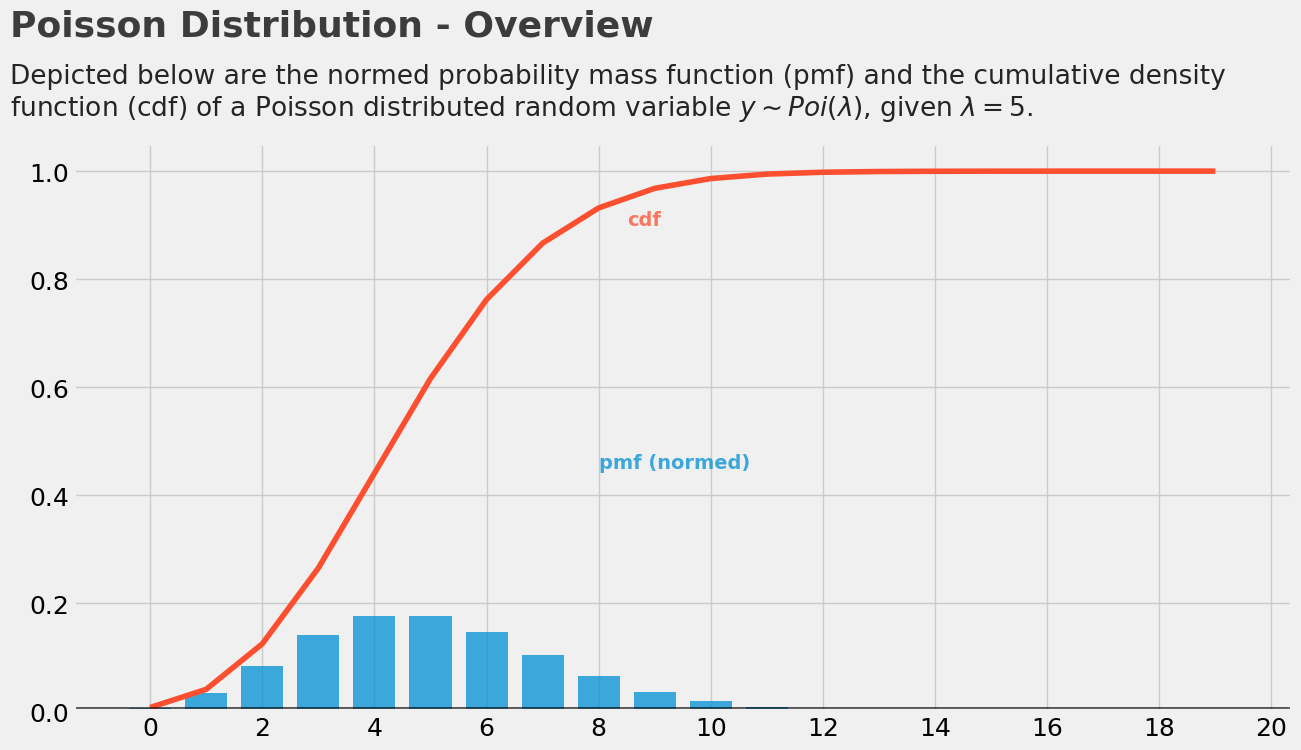

In [6]:
# IMPORTS
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.style as style
from IPython.core.display import HTML

# PLOTTING CONFIG
%matplotlib inline
style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = (14, 7)

plt.figure(dpi=100)

# PDF
plt.bar(left=np.arange(20), 
        height=(stats.poisson.pmf(np.arange(20), mu=5)), 
        width=.75,
        alpha=0.75
       )

# CDF
plt.plot(np.arange(20), 
         stats.poisson.cdf(np.arange(20), mu=5),
         color="#fc4f30",
        )

# LEGEND
plt.text(x=8, y=.45, s="pmf (normed)", alpha=.75, weight="bold", color="#008fd5")
plt.text(x=8.5, y=.9, s="cdf", alpha=.75, weight="bold", color="#fc4f30")

# TICKS
plt.xticks(range(21)[::2])
plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
plt.axhline(y = 0.005, color = 'black', linewidth = 1.3, alpha = .7)

# TITLE, SUBTITLE & FOOTER
plt.text(x = -2.5, y = 1.25, s = "Poisson Distribution - Overview",
               fontsize = 26, weight = 'bold', alpha = .75)
plt.text(x = -2.5, y = 1.1, 
         s = 'Depicted below are the normed probability mass function (pmf) and the cumulative density\nfunction (cdf) of a Poisson distributed random variable $ y \sim Poi(\lambda) $, given $ \lambda = 5 $.',
         fontsize = 19, alpha = .85)

***
## Parameters

Text(-2.5,0.425,'Depicted below are three Poisson distributed random variables with varying $\\lambda $. As one can easily\nsee the parameter $\\lambda$ shifts and flattens the distribution (the smaller $ \\lambda $ the sharper the function).')

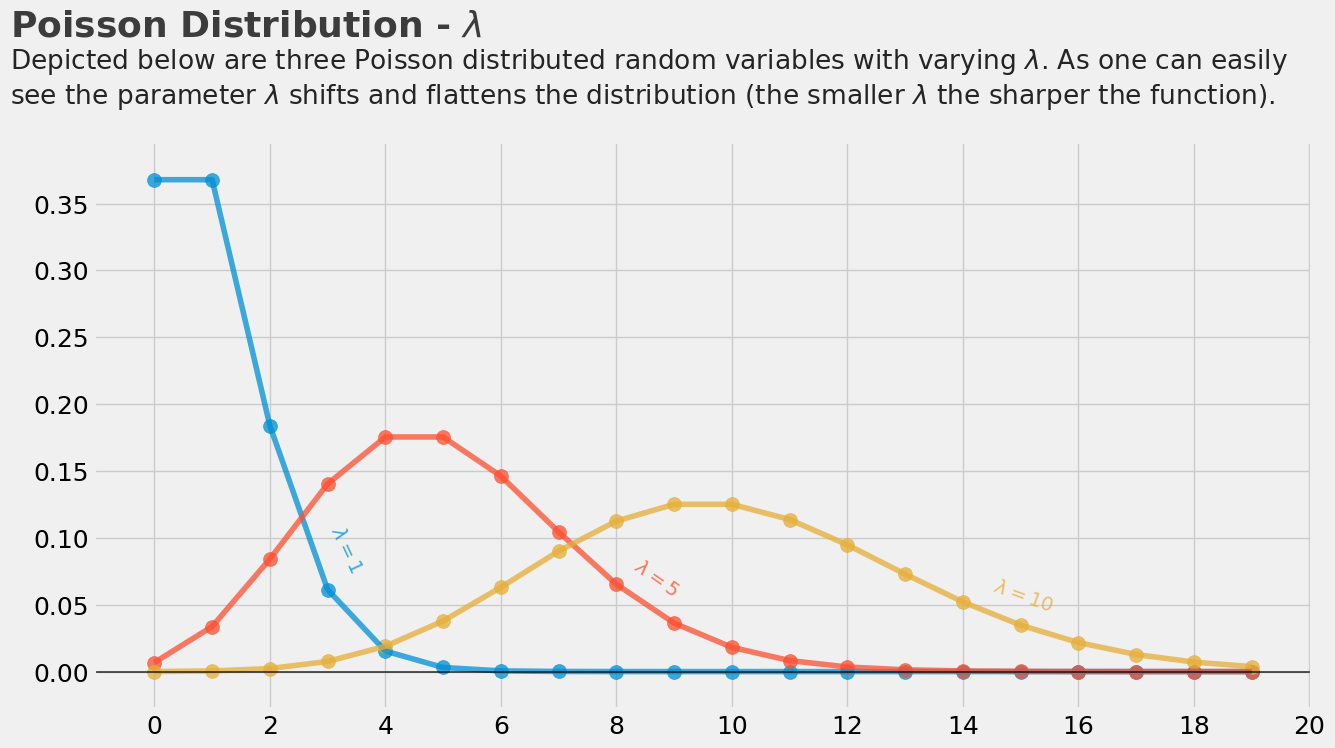

In [7]:
plt.figure(dpi=100)

# PDF LAM = 1
plt.scatter(np.arange(20),
            (stats.poisson.pmf(np.arange(20), mu=1)),#/np.max(stats.poisson.pmf(np.arange(20), mu=1))),
            alpha=0.75,
            s=100
       )
plt.plot(np.arange(20),
         (stats.poisson.pmf(np.arange(20), mu=1)),#/np.max(stats.poisson.pmf(np.arange(20), mu=1))),
         alpha=0.75,
        )

# PDF LAM = 5
plt.scatter(np.arange(20),
            (stats.poisson.pmf(np.arange(20), mu=5)),
            alpha=0.75,
            s=100
       )
plt.plot(np.arange(20),
         (stats.poisson.pmf(np.arange(20), mu=5)),
         alpha=0.75,
        )

# PDF LAM = 10
plt.scatter(np.arange(20),
            (stats.poisson.pmf(np.arange(20), mu=10)),
            alpha=0.75,
            s=100
       )
plt.plot(np.arange(20),
         (stats.poisson.pmf(np.arange(20), mu=10)),
         alpha=0.75,
        )

# LEGEND
plt.text(x=3, y=.1, s="$\lambda = 1$", alpha=.75, rotation=-65, weight="bold", color="#008fd5")
plt.text(x=8.25, y=.075, s="$\lambda = 5$", alpha=.75, rotation=-35, weight="bold", color="#fc4f30")
plt.text(x=14.5, y=.06, s="$\lambda = 10$", alpha=.75, rotation=-20, weight="bold", color="#e5ae38")

# TICKS
plt.xticks(range(21)[::2])
plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

# TITLE, SUBTITLE & FOOTER
plt.text(x = -2.5, y = .475, s = "Poisson Distribution - $\lambda$",
               fontsize = 26, weight = 'bold', alpha = .75)
plt.text(x = -2.5, y = .425, 
         s = 'Depicted below are three Poisson distributed random variables with varying $\lambda $. As one can easily\nsee the parameter $\lambda$ shifts and flattens the distribution (the smaller $ \lambda $ the sharper the function).',
         fontsize = 19, alpha = .85)

In [ ]:
import numpy as np
from scipy.stats import poisson

# draw a single sample
np.random.seed(42)
print(poisson.rvs(mu=10), end="\n\n")

# draw 10 samples
print(poisson.rvs(mu=10, size=10), end="\n\n")

### Probability Mass Function

In [ ]:
from scipy.stats import poisson

# additional imports for plotting purpose
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (14,7)


# continuous pdf for the plot
x_s = np.arange(15)
y_s = poisson.pmf(k=x_s, mu=5)
plt.scatter(x_s, y_s, s=100);

### Cumulative Probability Density Function

In [ ]:
from scipy.stats import poisson

# probability of x less or equal 0.3
print("P(X <=3) = {}".format(poisson.cdf(k=3, mu=5)))

# probability of x in [-0.2, +0.2]
print("P(2 < X <= 8) = {}".format(poisson.cdf(k=8, mu=5) - poisson.cdf(k=2, mu=5)))

***
## 绘制 $\lambda$

In [ ]:
from collections import Counter

plt.figure(dpi=100)

##### COMPUTATION #####
# DECLARING THE "TRUE" PARAMETERS UNDERLYING THE SAMPLE
lambda_real = 7

# DRAW A SAMPLE OF N=1000
np.random.seed(42)
sample = poisson.rvs(mu=lambda_real, size=1000)

# ESTIMATE MU AND SIGMA
lambda_est = np.mean(sample)
print("Estimated LAMBDA: {}".format(lambda_est))

##### PLOTTING #####
# SAMPLE DISTRIBUTION
cnt = Counter(sample)
_, values = zip(*sorted(cnt.items()))
plt.bar(range(len(values)), values/np.sum(values), alpha=0.25);

# TRUE CURVE
plt.plot(range(18), poisson.pmf(k=range(18), mu=lambda_real), color="#fc4f30")

# ESTIMATED CURVE
plt.plot(range(18), poisson.pmf(k=range(18), mu=lambda_est), color="#e5ae38")

# LEGEND
plt.text(x=6, y=.06, s="sample", alpha=.75, weight="bold", color="#008fd5")
plt.text(x=3.5, y=.14, s="true distrubtion", rotation=60, alpha=.75, weight="bold", color="#fc4f30")
plt.text(x=1, y=.08, s="estimated distribution", rotation=60, alpha=.75, weight="bold", color="#e5ae38")

# TICKS
plt.xticks(range(17)[::2])
plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
plt.axhline(y = 0.0009, color = 'black', linewidth = 1.3, alpha = .7)

# TITLE, SUBTITLE & FOOTER
plt.text(x = -2.5, y = 0.19, s = "Poisson Distribution - Parameter Estimation",
               fontsize = 26, weight = 'bold', alpha = .75)
plt.text(x = -2.5, y = 0.17, 
         s = 'Depicted below is the distribution of a sample (blue) drawn from a Poisson distribution with $\lambda = 7$.\nAlso the estimated distrubution with $\lambda \sim {:.3f}$ is shown (yellow).'.format(np.mean(sample)),
         fontsize = 19, alpha = .85)